Least squares intersection point and line fitting -- advanced. Equation (2.4) shows how the intersection of two 2D
lines can be expressed as their cross product, assuming the lines are expressed as homogenous coordinates.

1. If you are given more than two lines and want to find a point $\tilde{x}$ that minimizes the sum of squared distances to
each line, $$\displaystyle D = \sum_{i}(\tilde{x} \cdot \tilde{l}_i)^2$$ how can you compute this quantity? (Hint: Write the dot product as
$\tilde{x}^T\tilde{l}_i$, and turn the squared quantity into a quadratic form, $\tilde{x}^TA\tilde{x}$.)

In [22]:
%cd /home/ubuntu/CV-Algs-Apps-2ED
import numpy as np
import matplotlib.pyplot as plt
from src.primitives.point import Point2D
from src.primitives.line import Line2D

/home/ubuntu/CV-Algs-Apps-2ED


In [40]:
# Assert the classes work first

point1 = Point2D(3.0, 1.0, 1.0)
point2 = Point2D(-4.0, 5.0, 1.0)
line1 = Line2D(points=(point1, point2))
contains = line1.contains_point(point1)
print(f"{line1} contains {point1} = {contains}")
assert contains

print("\n")
line2 = Line2D(coeffs=(1.0, -7.0, 8.0))
line3 = Line2D(coeffs=(3.0, -4.0, 1.0))
inter = line2.intersection_with(line3)
print(f"inter: {inter}")
assert inter == Point2D(25.0, 23.0, 17.0)

Line2D([[-4.]
 [-7.]
 [19.]]) contains Point2D([[3.]
 [1.]
 [1.]]) = True


inter: Point2D([[25.]
 [23.]
 [17.]])


A: [[125. -42.  11.]
 [-42. 165.  13.]
 [ 11.  13.   3.]]

Solution point: Point2D([[-0.13]
 [-0.11]
 [ 1.  ]])


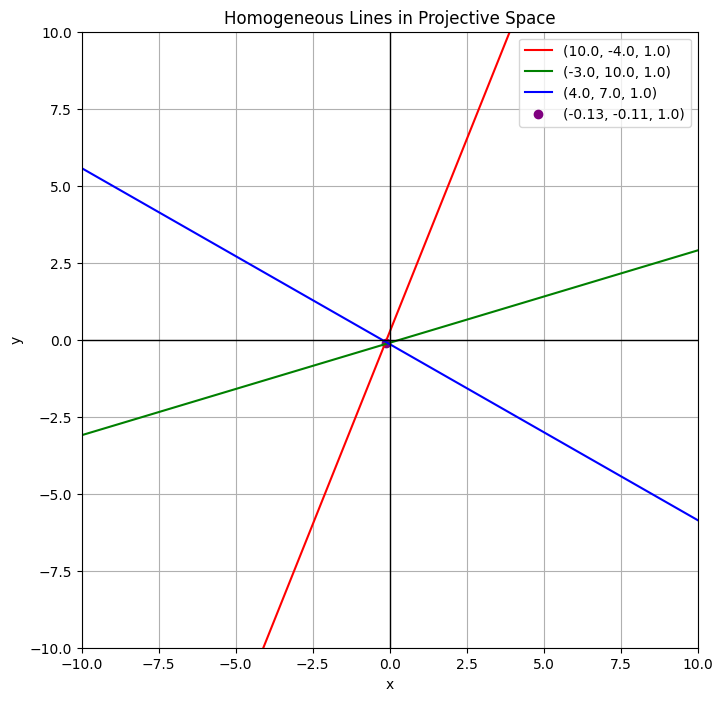

In [46]:
# Solution

line1 = Line2D(coeffs=(10.0, -4.0, 1.0))
line2 = Line2D(coeffs=(-3.0, 10.0, 1.0))
line3 = Line2D(coeffs=(4.0, 7.0, 1.0))

def get_A(l_list: list[Line2D]) -> np.ndarray:
    """
    Get A (sum A for all lines)

    Args:
        l_list: The list of all lines

    Returns:
        The matrix
    """
    A: np.ndarray = np.zeros((len(l_list), 3))
    for l in l_list:
        A += np.outer(l.vector, l.vector.T)
    print(f"A: {A}\n")
    return A

A = get_A([line1, line2, line3])
U, S, Vt = np.linalg.svd(A)  # Singular Value Decomposition
null_space = Vt.T[:, -1]  # The last right singular vector of A (page 735 equation A.37)
null_space /= null_space[-1] # Make last coefficient 1
solution = Point2D(round(null_space[0], 2), round(null_space[1], 2), round(null_space[2], 2))
print("Solution point:", solution)

def line_eq(a: float, b: float, c: float, x_vals: list[float]) -> list[float]:
    """
    Equation of line ax + by + c = 0, solve for y in terms of x.

    Args:
        a: Coefficient
        b: Coefficient
        c: Coefficient
        x_vals: The x values used to get y values

    Returns:
        y value
    """
    y = (-a * x_vals - c) / b
    return y

# Generate x values from -10 to 10 with 10 values
x_vals = np.linspace(-10, 10, 10)

# Calculate the corresponding y values for each line
y_vals_line1 = line_eq(line1.a, line1.b, line1.c, x_vals)
y_vals_line2 = line_eq(line2.a, line2.b, line2.c, x_vals)
y_vals_line3 = line_eq(line3.a, line3.b, line3.c, x_vals)

# Plot the lines and point
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals_line1, label=f"({line1.a}, {line1.b}, {line1.c})", color="r")
plt.plot(x_vals, y_vals_line2, label=f"({line2.a}, {line2.b}, {line2.c})", color="g")
plt.plot(x_vals, y_vals_line3, label=f"({line3.a}, {line3.b}, {line3.c})", color="b")
plt.scatter(solution.x, solution.y, label=f"({solution.x}, {solution.y}, {solution.w})", color="purple")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Homogeneous Lines in Projective Space")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()